In [1]:
!pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.30.0 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
kfp 1.8.20 requires google-api-python-client<2,>=1.7.8, but you have google-api-python-client 2.86.0 which is incompatible.
kfp 1.8.20 requires PyYAML<6,>=5.3, but you have pyyaml 6.0 which is incompatible.
gcsfs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2023.4.0 which is incompatible.
beatrix-jupyterlab 2023.46.184821 requires jupyter-server~=1.16, but you have jupyter-server 2.5.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 10.0.1 which is incompa

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200):
    print(f'Searching for {term}')
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep

categories = "alien", "human"
path = Path('species')

for category in categories:
    dest = (path/category)
    dest.mkdir(exist_ok=True, parents=True)
    
    prompt = 'alien image' if category == 'alien' else 'human photo'
    
    download_images(dest, urls=search_images(prompt, max_images=150))
    
    sleep(5)
             
    resize_images(path/category, max_size=400, dest=path/category)
    

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Searching for alien image


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for human photo


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

In [5]:
# !ls species/human
# !rm -rf species/alien/species
# !rm -rf species/human/species

 027783a2-365f-4fd1-8310-1d80cab009f2.jpg
 063dcfb3-4f34-4d39-a686-eeecd1850218.jpg
 0850915f-30c1-4f72-91e0-89d06f3bf32a.jpg
 0cc724c0-2e89-4341-b8c6-4464723a5a97.jpg
 0f03f618-3ef0-4617-8eb3-6a19e60ffdeb.jpeg
 0f86c1a2-9e5c-4537-91c4-d246699911f1.png
 1084c294-b628-44c1-8ddf-e40ad2375683.jpg
 1094a381-829d-4b9e-ba10-83a5a1cee096.jpg
 113314f4-f1c4-469f-b12c-d8e3d791fa09.jpg
 148d58cb-9965-47f1-96aa-c38cb570fae6.jpg
 161b097b-e829-45c2-908d-38c2bf8addf2.png
 161d0fb8-8bb5-4c63-bfd4-c845bf8f2d15.jpg
 19653eab-3337-49f2-83a8-fb1a2f72810a.jpeg
 1a247efa-7297-4959-aa37-1e508570745f.jpg
 1b0f2277-fa8b-4cca-b7f8-38248fdf0d3f.jpg
 1ead3857-990a-465d-a64d-141a503774a0.jpg
 203089eb-1883-4851-a69c-2b51aa774988.jpg
 2030a668-c6fe-4df3-a2eb-7114f15da3a4.jpg
 22672337-3ff7-4f32-81a5-eb44fdc3091c.jpg
'26798de2-8d14-4165-94cd-ce05cac4a2a6.jpg!d'
 29c34e92-b94a-4aa0-8d71-d1b6828e9f7b.jpg
 2a97689f-ffbe-484c-8c90-de301f39c4ac.jpg
 2bcd6785-bff1-4472-99d1-e149b47f5bbe.jpg
 2d1d4085-8a71-4214-ab74-1fce

In [6]:
import os

for category in categories:
    for image in os.listdir(path/category):
        im = Image.open(path/category/image)
        if im.format == 'PNG':
            if im.mode != 'RGBA':
                print(f"found wrong mode photo: {image}")
                im.convert('RGBA').save(path/category/f'{image}2.png')

found wrong mode photo: 4899a2de-4a12-42a8-8134-876f82a8c189.png
found wrong mode photo: f8467b44-0b3e-4ebe-9f8e-5346a8c4bbf8.png
found wrong mode photo: fdce4d96-374e-43b6-80df-7b73fd787caf.png
found wrong mode photo: 5a25f893-97b9-48d0-b528-cd7fd265e479.png
found wrong mode photo: 7906eeb0-68d3-4aa4-9f99-7d2ddf64be7b.png
found wrong mode photo: cb7f1b43-8201-4f87-909c-5d811b50731d.png
found wrong mode photo: ee661dfd-acd9-46ab-88e3-21cdfc72d6a8.png
found wrong mode photo: d448710d-2802-4446-b8e5-3d06f3aca293.png
found wrong mode photo: 72c8383c-734f-4975-a0e0-fe2793dcb3bf.png
found wrong mode photo: 264d959b-f507-4446-a90d-dae2a9e35b0a.png
found wrong mode photo: 57573609-89a8-4427-b17c-2c79403a02d5.png
found wrong mode photo: b65f8a64-8a04-4193-bb37-c9e864c63b39.png
found wrong mode photo: db6b85ac-c39c-441b-9ed4-5181c9940300.png
found wrong mode photo: 16531a21-d6c3-466d-9166-4b24882a299d.png
found wrong mode photo: 3b7672fb-db10-4c11-8f00-6d0b28bb4f57.png
found wrong mode photo: 4

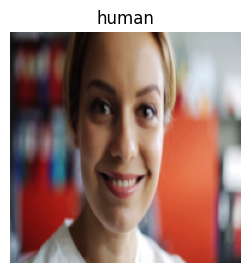

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=420),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=8)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 80.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.791690,0.214407,0.095238,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.195611,0.215947,0.079365,00:02
1,0.150983,0.209773,0.095238,00:02
2,0.104769,0.126199,0.047619,00:02
3,0.089200,0.115422,0.047619,00:02
4,0.082510,0.145368,0.047619,00:02


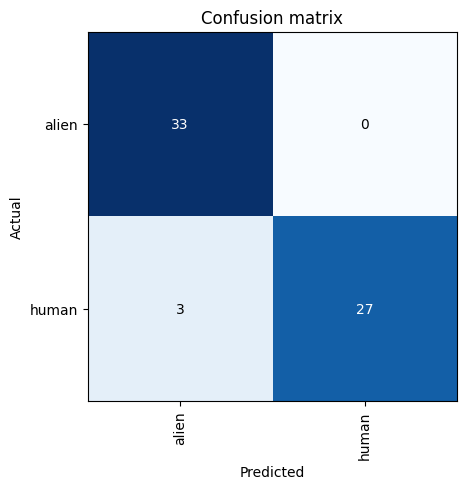

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

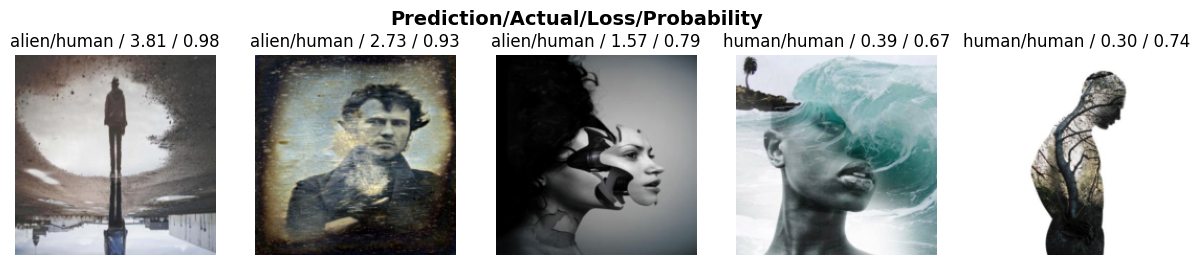

In [10]:
interp.plot_top_losses(5, nrows=1)

In [11]:
learn.export('model.pkl')